In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import re

In [3]:
df = pd.read_csv('rnnTest.csv')
df = df[df['experiment'].str.contains("smoothing")]
perf_metrics = ['Bleu_1', 'Bleu_2', 'Bleu_3', 'Bleu_4', 'METEOR', 'ROUGE_L', 'CIDEr']
for metric in perf_metrics:
  df[metric] = df[metric].apply(lambda x: round(x*100.0, 2))
df.tail()

,experiment,epoch,loss,date,Bleu_1,Bleu_2,Bleu_3,Bleu_4,METEOR,ROUGE_L,CIDEr
19,resnet50_h1024_bs32_ft1_aap1_smoothing0,6,187.210952,2020-04-15 08:37:29.503812,62.99,45.27,31.90,22.04,21.36,47.56,55.45
20,resnet101_h256_bs64_ft0_aap1_smoothing0,21,182.712203,2020-04-15 08:39:20.754660,60.51,42.42,29.28,19.92,20.60,46.03,53.52
21,resnet101_h1024_bs32_ft1_aap1_smoothing0,6,186.546437,2020-04-15 11:53:01.354201,63.00,45.41,31.86,21.99,21.92,48.05,58.64
22,resnet50_h1024_bs32_ft0_aap1_smoothing0,6,190.426664,2020-04-15 12:14:54.934210,60.68,42.98,29.96,20.80,20.62,45.90,51.88
23,resnet101_h1024_bs32_ft0_aap1_smoothing0,12,185.054270,2020-04-15 16:00:34.066662,60.73,42.77,29.63,20.25,20.99,46.26,52.39


In [4]:
exp_idx_to_label = {
  0: 'encoder',
  1: 'lstm_hidden_units',
  2: 'batch_size',
  3: 'fine_tune'
}

for index, row in df.iterrows():
  for exp_idx, item in enumerate(row['experiment'].split('_')):
    if exp_idx in exp_idx_to_label:
      item = int(re.sub("[^0-9]", "", item)) if exp_idx != 0 else item
      df.at[index, exp_idx_to_label[exp_idx]] = item
      
df.tail()

,experiment,epoch,loss,date,Bleu_1,Bleu_2,Bleu_3,Bleu_4,METEOR,ROUGE_L,CIDEr,encoder,lstm_hidden_units,batch_size,fine_tune
19,resnet50_h1024_bs32_ft1_aap1_smoothing0,6,187.210952,2020-04-15 08:37:29.503812,62.99,45.27,31.90,22.04,21.36,47.56,55.45,resnet50,1024.0,32.0,1.0
20,resnet101_h256_bs64_ft0_aap1_smoothing0,21,182.712203,2020-04-15 08:39:20.754660,60.51,42.42,29.28,19.92,20.60,46.03,53.52,resnet101,256.0,64.0,0.0
21,resnet101_h1024_bs32_ft1_aap1_smoothing0,6,186.546437,2020-04-15 11:53:01.354201,63.00,45.41,31.86,21.99,21.92,48.05,58.64,resnet101,1024.0,32.0,1.0
22,resnet50_h1024_bs32_ft0_aap1_smoothing0,6,190.426664,2020-04-15 12:14:54.934210,60.68,42.98,29.96,20.80,20.62,45.90,51.88,resnet50,1024.0,32.0,0.0
23,resnet101_h1024_bs32_ft0_aap1_smoothing0,12,185.054270,2020-04-15 16:00:34.066662,60.73,42.77,29.63,20.25,20.99,46.26,52.39,resnet101,1024.0,32.0,0.0


## Experiment 1: Effect of improved image feature quality

In [5]:
img_quality_df = df[(df['lstm_hidden_units'] == 512) & (df['fine_tune'] == 0)]
img_quality_df = img_quality_df.drop(['date', 'experiment', 'epoch', 'loss', 'fine_tune'], axis = 1) 
img_quality_df = img_quality_df.set_index('encoder')
img_quality_df

,Bleu_1,Bleu_2,Bleu_3,Bleu_4,METEOR,ROUGE_L,CIDEr,lstm_hidden_units,batch_size
encoder,,,,,,,,,
resnet18,58.57,40.37,27.39,18.32,19.99,44.94,47.71,512.0,64.0
resnet50,59.95,42.34,29.26,20.06,20.79,45.63,52.65,512.0,64.0
resnet101,60.73,43.06,29.55,20.17,20.46,46.10,51.01,512.0,64.0


Text(0.5, 1.0, 'Effect of improved image feature extraction on scores')

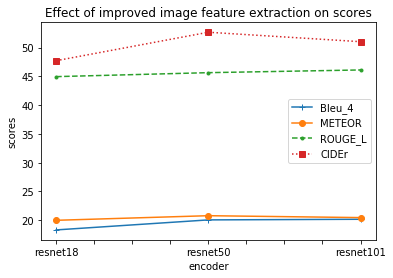

In [6]:
ax = img_quality_df[['Bleu_4', 'METEOR', 'ROUGE_L', 'CIDEr']].plot(style=['+-','o-','.--','s:'])
ax.set_ylabel("scores")
ax.set_title("Effect of improved image feature extraction on scores")

## Experiment 2: Effect of fine-tuning the encoders

In [7]:
img_quality_df = df[(df['lstm_hidden_units'] == 512)]
print(img_quality_df.shape)
img_quality_df = img_quality_df.drop(['date', 'experiment', 'epoch', 'loss'], axis = 1) 
img_quality_df = img_quality_df.sort_values(by=['encoder', 'fine_tune'])

img_quality_df

(6, 15)


,Bleu_1,Bleu_2,Bleu_3,Bleu_4,METEOR,ROUGE_L,CIDEr,encoder,lstm_hidden_units,batch_size,fine_tune
12,60.73,43.06,29.55,20.17,20.46,46.10,51.01,resnet101,512.0,64.0,0.0
11,62.87,45.13,31.47,21.47,21.58,48.15,57.47,resnet101,512.0,64.0,1.0
8,58.57,40.37,27.39,18.32,19.99,44.94,47.71,resnet18,512.0,64.0,0.0
14,60.52,42.37,29.23,20.07,20.14,45.75,49.57,resnet18,512.0,64.0,1.0
10,59.95,42.34,29.26,20.06,20.79,45.63,52.65,resnet50,512.0,64.0,0.0
9,62.69,45.09,31.86,22.12,21.42,47.81,55.13,resnet50,512.0,64.0,1.0


### Plot the difference between fine tuing and without fine tuning

In [8]:
# img_quality_df = img_quality_df.set_index('encoder')
finetuned_diff_df = img_quality_df.set_index(['encoder']).groupby('encoder').diff()

finetuned_diff_df = finetuned_diff_df.dropna()
finetuned_diff_df = finetuned_diff_df.reindex(["resnet18", "resnet50", "resnet101"])
finetuned_diff_df

,Bleu_1,Bleu_2,Bleu_3,Bleu_4,METEOR,ROUGE_L,CIDEr,lstm_hidden_units,batch_size,fine_tune
encoder,,,,,,,,,,
resnet18,1.95,2.00,1.84,1.75,0.15,0.81,1.86,0.0,0.0,1.0
resnet50,2.74,2.75,2.60,2.06,0.63,2.18,2.48,0.0,0.0,1.0
resnet101,2.14,2.07,1.92,1.30,1.12,2.05,6.46,0.0,0.0,1.0


Text(0.5, 1.0, 'Difference of scores with and without fine-tuning')

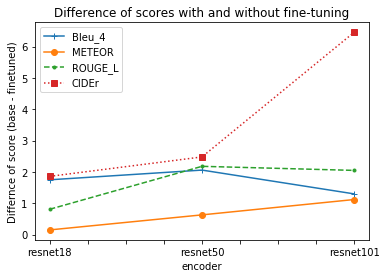

In [12]:
ax = finetuned_diff_df[['Bleu_4', 'METEOR', 'ROUGE_L', 'CIDEr']].plot(style=['+-','o-','.--','s:'])
ax.set_ylabel("Differnce of score (base - finetuned)")
ax.set_title("Difference of scores with and without fine-tuning")

## Experiment 3: Effect of varying LSTM dimension size

Encoder Type used:  resnet18


,Bleu_1,Bleu_2,Bleu_3,Bleu_4,METEOR,ROUGE_L,CIDEr
lstm_hidden_units,,,,,,,
256.0,58.90,41.04,28.07,19.04,19.93,44.84,48.31
512.0,58.57,40.37,27.39,18.32,19.99,44.94,47.71
1024.0,59.75,41.46,28.37,19.29,20.34,45.36,49.53


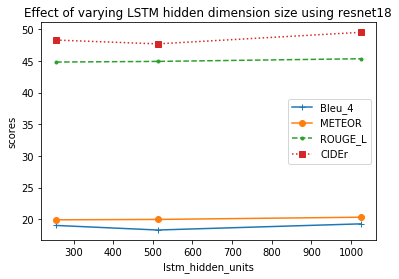

Encoder Type used:  resnet50


,Bleu_1,Bleu_2,Bleu_3,Bleu_4,METEOR,ROUGE_L,CIDEr
lstm_hidden_units,,,,,,,
256.0,60.01,42.33,29.08,19.79,20.76,45.83,52.76
512.0,59.95,42.34,29.26,20.06,20.79,45.63,52.65
1024.0,60.68,42.98,29.96,20.80,20.62,45.90,51.88


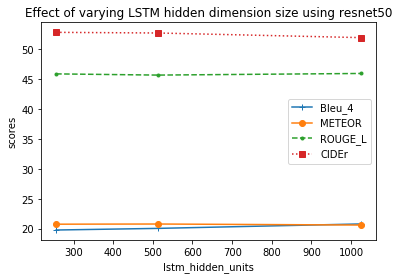

Encoder Type used:  resnet101


,Bleu_1,Bleu_2,Bleu_3,Bleu_4,METEOR,ROUGE_L,CIDEr
lstm_hidden_units,,,,,,,
256.0,60.51,42.42,29.28,19.92,20.60,46.03,53.52
512.0,60.73,43.06,29.55,20.17,20.46,46.10,51.01
1024.0,60.73,42.77,29.63,20.25,20.99,46.26,52.39


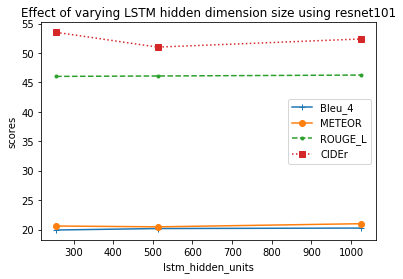

In [10]:
from IPython.display import display, HTML

for encoder in ["resnet18", "resnet50", "resnet101"]:
  decoder_dim_df = df[(df['fine_tune'] == 0) & (df['encoder'] == encoder)] \
    .sort_values(by=['lstm_hidden_units']) \
    .drop(['date', 'experiment', 'epoch', 'loss', 'fine_tune', 'batch_size', 'encoder'], axis = 1) \
    .set_index('lstm_hidden_units')

  print("==================================================")
  print("Encoder Type used: ", encoder)
#   print(decoder_dim_df)
  display(HTML(decoder_dim_df.to_html()))
  
  ax = decoder_dim_df[['Bleu_4', 'METEOR', 'ROUGE_L', 'CIDEr']].plot(style=['+-','o-','.--','s:'])
  ax.set_ylabel("scores")
  ax.set_title("Effect of varying LSTM hidden dimension size using " + encoder)
  plt.show()